# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].count()
total_unique_mice = combined_df["Mouse ID"].unique()
total_mice

1893

In [5]:
#unique mice
len(total_unique_mice)

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False),"Mouse ID"].unique()

duplicates

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_df[combined_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df["Mouse ID"] == "g989"].index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
total_cleaned_mice = len(clean_df["Mouse ID"].unique())
total_cleaned_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_df = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tv_mean = regimen_df["Tumor Volume (mm3)"].mean()
tv_median = regimen_df["Tumor Volume (mm3)"].median()
tv_var = regimen_df["Tumor Volume (mm3)"].var()
tv_std = regimen_df["Tumor Volume (mm3)"].std()
tv_sem = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame({
    "Mean Tumor Volume": tv_mean,
    "Median Tumor Volume": tv_median,
    "Tumor Volume Variance": tv_var,
    "Tumor Volume Std. Dev.": tv_std,
    "Tumor Volume Std. Err.": tv_sem
})
regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"]))
regimen_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

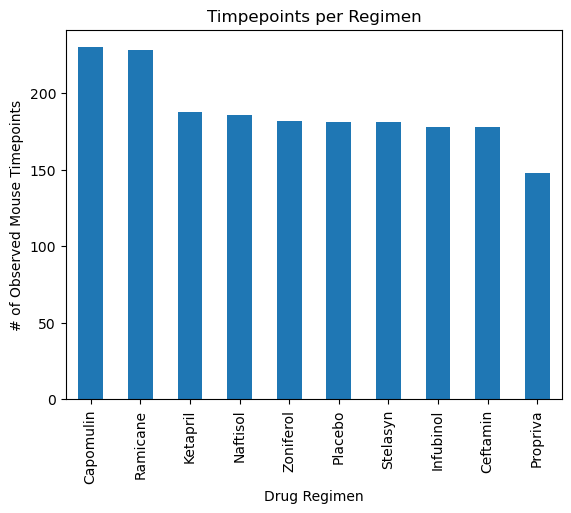

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.title("Timpepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

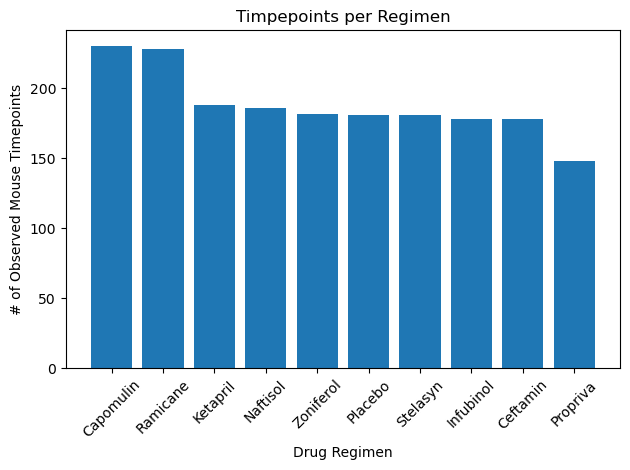

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = drug_counts
y = drug_counts

plt.bar(drug_counts.index, drug_counts.values)

plt.title("Timpepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Unique Female vs Male Mice'}, ylabel='count'>

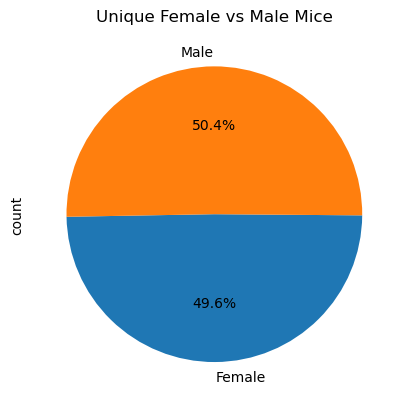

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender = clean_df.drop_duplicates(subset="Mouse ID").groupby("Sex")["Mouse ID"].count()

# Make the pie chart
unique_gender.plot.pie(autopct="%1.1f%%", startangle=181, title="Unique Female vs Male Mice", label="count")

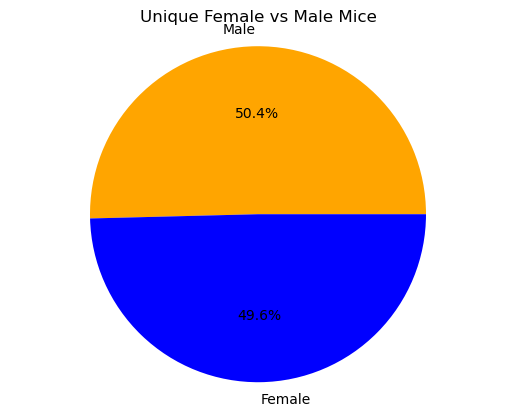

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset="Mouse ID")
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
labels = gender_counts.index
sizes = gender_counts.values
colors = ["orange","blue"]
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.title("Unique Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(clean_df, last_time, on=["Mouse ID", "Timepoint"])
final_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_regimen_df = final_tumor_df[final_tumor_df["Drug Regimen"] == regimen]
    
    # add subset
    quartiles = final_regimen_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{regimen}'s potential outliers: {lower_bound}")
    print(f"{regimen}'s potential outliers: {upper_bound}")

Capomulin's potential outliers: 20.70456164999999
Capomulin's potential outliers: 51.83201549
Ramicane's potential outliers: 17.912664470000003
Ramicane's potential outliers: 54.30681135
Infubinol's potential outliers: 36.83290494999999
Infubinol's potential outliers: 82.74144559000001
Ceftamin's potential outliers: 25.355449580000002
Ceftamin's potential outliers: 87.66645829999999


In [21]:
final_tumor_df.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
a203      Infubinol     Female  20          23          45         67.973419           2                   1
s121      Infubinol     Male    23          26          25         55.650681           2                   1
q597      Ramicane      Male    20          25          45         45.220869           2                   1
q610      Ramicane      Female  18          21          35         36.561652           2                   1
q633      Zoniferol     Male    12          25          45         70.827796           2                   1
                                                                                                          ..
j246      Capomulin     Female  21          21          35         38.753265           1                   1
j296      Ceftamin      Female  24          30          45         61.849023           3                   1
j365      Zoniferol     

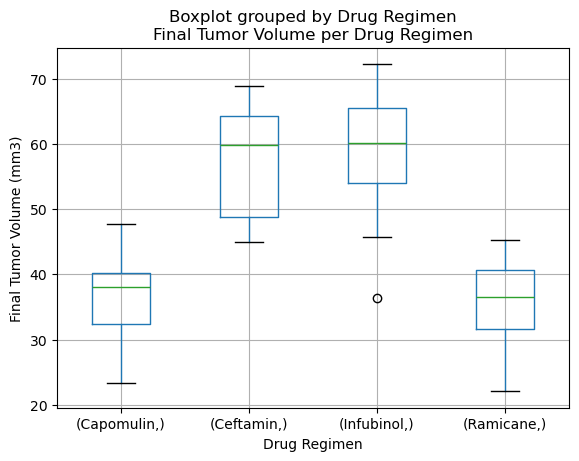

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plot_regimens_df = final_tumor_df[final_tumor_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

ax = plot_regimens_df.boxplot(column="Tumor Volume (mm3)", by=["Drug Regimen"])
ax.set_title("Final Tumor Volume per Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [24]:
plot_regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


Text(0, 0.5, 'Tumor Volume (mm3)')

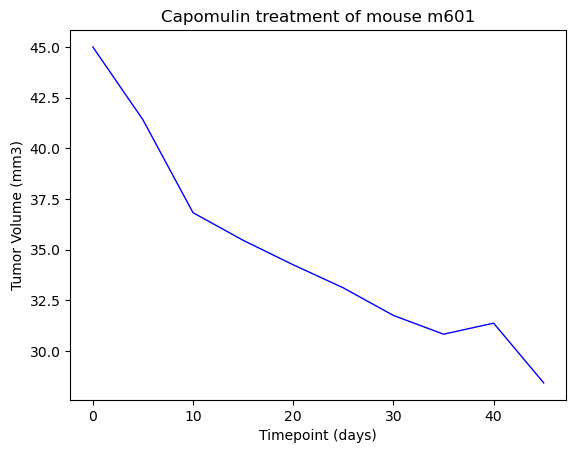

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "m601"
capomulin_m601 = clean_df[(clean_df["Mouse ID"] == mouse_id) & (clean_df["Drug Regimen"] == "Capomulin")]

plt.plot(capomulin_m601["Timepoint"], capomulin_m601["Tumor Volume (mm3)"], color="blue", linewidth=1)
plt.title("Capomulin treatment of mouse m601")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

In [26]:
capomulin_m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


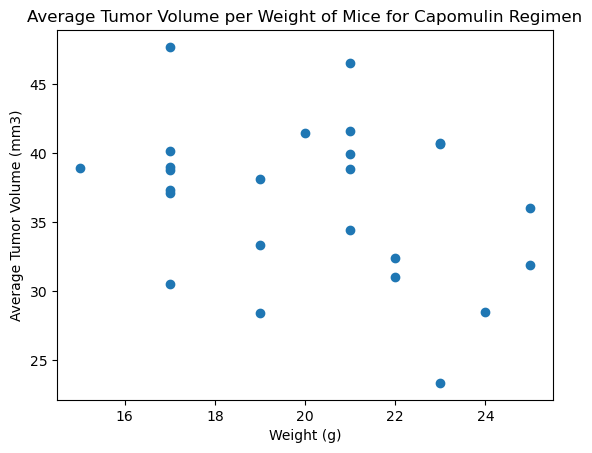

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_only = plot_regimens_df[plot_regimens_df["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_only.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_only["Weight (g)"], average_tumor_volume)
plt.title("Average Tumor Volume per Weight of Mice for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [63]:
capomulin_only.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, r_value, _, _ = st.linregress(capomulin_only["Weight (g)"], capomulin_only[average_tumor_volume])

tumor_volume = intercept + slope * capomulin_only["Weight (g)"]

print(f"Correlation coefficient between mouse weight and the average tumor volume is {r_value:.2f}")


NameError: name 'capomulin_only' is not defined